## SONAR Rock vs Mine Prediction

Objective: Predict whether the object is a mine or rock in the ocean using SONAR data.

### Collect the data

In [4]:
# load from google-drive
# "https://drive.google.com/file/d/1-6ZKvqPXDIdVp9kSzKglhHiL9_fw1Ddv/view?usp=sharing"

dataId="1-6ZKvqPXDIdVp9kSzKglhHiL9_fw1Ddv"

In [5]:
data_url = "https://drive.google.com/uc?export=download&id=" + dataId

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv(data_url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Preprocess the data

In [8]:
data.shape

(208, 61)

In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
data[60].value_counts()
#sum(data.iloc[:,-1]=='R') 

60
M    111
R     97
Name: count, dtype: int64

In [11]:
# lets see: statistically, are features mean value is diff for Rock and Mine
data.groupby(60).mean() 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [12]:
# X = data.drop(column=60, axis=1)
# Y = data[60]
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [13]:
# Correlation in features
corr = X.corr()
corr.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710


In [14]:
# visualize the corr matrix using seaborn
import seaborn as sns

<Axes: >

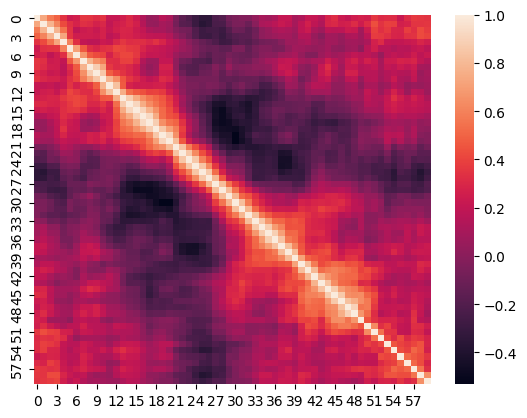

In [15]:
sns.heatmap(corr)

Data Exploaration:
- Last column is prediction: R=Rock, M=Mine (Binary Classification problem)
- SONAR input: 59 features.
- 208 sample points. Not enough to use Deep NN or high parametric models
- No missing datapoints or nan values. 
- All the features are Positve and less than or equal to 1. Standardization may not be required.
- From groupby(), mean value of each feature is significant diff for both category 
- 97 data points for Rock, and 111 data points for Mine. Balanced dataset
- Correlation among features: Looks like Not siginificant correlation among features (which is good thing).

### Test-Train split  

In [16]:
# using sklearn
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
# stratify = to preserve same proportion of example of each class as observed in original dataset. 
# here we use Y (R,M) so that test and train both will have same proportion of M,R.

In [18]:
X_train.shape, X_test.shape

((187, 60), (21, 60))

### Build classification model

There are several classification models. 
For Example: 
#### 1. Logistic Regression: 
Logistic regression does not make many of the key assumptions of linear regression like linearity, normality, homoscedasticity. However, some other assumptions still apply.
- logistic regression requires the observations to be independent of each other.
- logistic regression requires there to be little or no multicollinearity among the independent variables.

  **Good fit in our case!**
#### 2. Naive Bays:
When assumption of independence holds, the classifier performs better compared to other machine learning models like logistic regression or decision tree, and requires less training data.
It perform well in case of categorical input variables compared to numerical variable(s)
Naive Bayes is also known as a bad estimator. (We have numerical values in features. Not a great fit for this problem.)

#### 3. K-NN:
It is an unsupervised learning. Its known for its simplicity, adaptability, versatility for classification and regression tasks, no need for training, interpretability, and minimal assumptions. computationally intensive for large datasets and sensitive to outliers. Selecting the right 'K' value is essential. Pick the right distance metric for your data.( Not a good case for K. Plus deciding hyperparmeter (K, distance) is challenging).

#### 4. Decision-Tree:
Advantages:does not require normalization, scaling of data. Missing values is also fine.
A Decision tree model is very intuitive and easy to explain.
Disadvantage: Decision tree training is relatively expensive as the complexity and time has taken are more.
The Decision Tree algorithm is inadequate for applying regression and predicting continuous values. **(good candidate)**

#### 5. Random Forest:
The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”(link resides outside ibm.com), generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. **(good candidate)**

#### 6. SVM:
Pros: more effective in high dimensional spaces. SVM is effective in cases where the number of dimensions is greater than the number of samples. SVM is relatively memory efficient. 
Cons: SVM algorithm is not suitable for large data sets. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping. Underperform when number of features exceeds the number of training data samples. No probabilistic explanation for the classification. **(good candidate)**




### Train the model

In [19]:
# lets try Logistic first
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
# Evaluation
from sklearn.metrics import accuracy_score

In [24]:
# Evaluation
Y_test_hat = model.predict(X_test)
Y_train_hat = model.predict(X_train)

In [27]:
acc_test = accuracy_score(Y_test_hat, Y_test)
acc_train = accuracy_score(Y_train_hat, Y_train)

In [28]:
acc_train, acc_test

(0.8342245989304813, 0.7619047619047619)

In [33]:
from sklearn.metrics import f1_score

In [38]:
conf_mat = confusion_matrix(Y_test_hat, Y_test)
conf_mat

array([[9, 3],
       [2, 7]])

In [39]:
conf_mat = confusion_matrix(Y_train_hat, Y_train)
conf_mat

array([[86, 17],
       [14, 70]])

In [ ]:
# Lets try Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [51]:
# Evaluation
Y_test_hat = dtree.predict(X_test)
Y_train_hat = dtree.predict(X_train)

acc_test = accuracy_score(Y_test_hat, Y_test)
acc_train = accuracy_score(Y_train_hat, Y_train)

acc_train, acc_test

(1.0, 0.8095238095238095)

In [52]:
conf_mat = confusion_matrix(Y_test_hat, Y_test)
conf_mat

array([[9, 2],
       [2, 8]])

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
randForest = RandomForestClassifier()
randForest.fit(X_train, Y_train)

RandomForestClassifier()

In [59]:
# Evaluation
Y_test_hat = randForest.predict(X_test)
Y_train_hat = randForest.predict(X_train)

In [60]:
acc_test = accuracy_score(Y_test_hat, Y_test)
acc_train = accuracy_score(Y_train_hat, Y_train)

acc_train, acc_test

(1.0, 0.7142857142857143)

In [61]:
conf_mat = confusion_matrix(Y_test_hat, Y_test)
conf_mat

array([[9, 4],
       [2, 6]])

In [63]:
# Last Hope is SVM
from sklearn.svm import SVC

In [64]:
svm = RandomForestClassifier()
svm.fit(X_train, Y_train)
# Evaluation
Y_test_hat = svm.predict(X_test)
Y_train_hat = svm.predict(X_train)

In [65]:
acc_test = accuracy_score(Y_test_hat, Y_test)
acc_train = accuracy_score(Y_train_hat, Y_train)
conf_mat = confusion_matrix(Y_test_hat, Y_test)

acc_train, acc_test, conf_mat

(1.0,
 0.7619047619047619,
 array([[9, 3],
        [2, 7]]))

### Conclusion

Given All the methods, the test_acc does not improve significant. However, Decision Tree out performed other algorithms.

Further possible improvment: 
- Hyperparamete tuning
- PCA